# Proyecto 9

## Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Se tienen los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

## Objetivo

1. Crear un modelo con el máximo valor F1 posible (al menos 0.59).

    1.1. Verificar F1 para el conjunto de prueba. 

2. Medir la métrica AUC-ROC

    2.1. Compararla con el valor F1.

## Pasos

1. Preparar los datos.
2. Examinar el equilibrio de clases.

    2.1. Entrenar el modelo sin tener en cuenta el desequilibrio.
3. Mejorar la calidad del modelo.
    
    3.1. Utilizar al menos dos enfoques para corregir el desequilibrio de clases. 

    3.2. Utilizar conjuntos de entrenamiento y validación.

    3.3. Entrenar diferentes modelos con los conjuntos de entrenamiento y validación.

    3.4. Describrir hallazgos. 

4. Realizar prueba final.

## Descripción de datos

**Características**

- RowNumber: índice de cadena de datos

- CustomerId: identificador de cliente único

- Surname: apellido

- CreditScore: valor de crédito

- Geography: país de residencia

- Gender: sexo

- Age: edad

- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)

- Balance: saldo de la cuenta

- NumOfProducts: número de productos bancarios utilizados por el cliente

- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)

- IsActiveMember: actividad del cliente (1 - sí; 0 - no)

- EstimatedSalary: salario estimado

**Objetivo**

- Exited: El cliente se ha ido (1 - sí; 0 - no)

## Preparación de datos

In [1]:
# Importación de librerías

import warnings
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

# Preprocesamiento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Omitir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importación de dataset

data = pd.read_csv('Churn.csv')

In [3]:
# Descripción de datos

data.info()

display(data.head())

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Análisis de duplicados totales

print(data.duplicated().sum())

0


In [5]:
# Conteo de valores ausentes

print(data.Tenure.isna().sum())

909


<span style=color:blue> **Comentario:** </span>

No hay valores ausentes, a excepción de los 909 de la columna *Tenure*, ya que esta columna incluye datos de inversiones a plazo, un valor ausente significa que los clientes no han contratado ese servicio. **Se convertirán a 0 los NaN de esta columna, para poder entrenar los modelos**. 

No hay valores duplicados totales en el dataset. 

Hay valores tipo *object* en tres columnas: *Surname*, *Geography* y *Gender*. **Para poder entrenar los modelos se utilizará OrdinalEncoder**.

Para evitar que algunos valores numéricos tengan más peso que otros, **se utilizará escalado de características, estandarizando estos datos**.

Considero que las **columnas *RowNumber*, *CustomerId* y *Surname*** no aportan información valiosa para la predicción, por lo que **serán eliminadas**

In [6]:
# Cambio de valores NaN por 0

data.Tenure.fillna(0, inplace=True)

In [7]:
# Eliminación de columnas RowNumber, CustomerId y Surname

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Equilibrio de clases

Text(0.5, 1.0, 'Proporción de clientes activos y no activos')

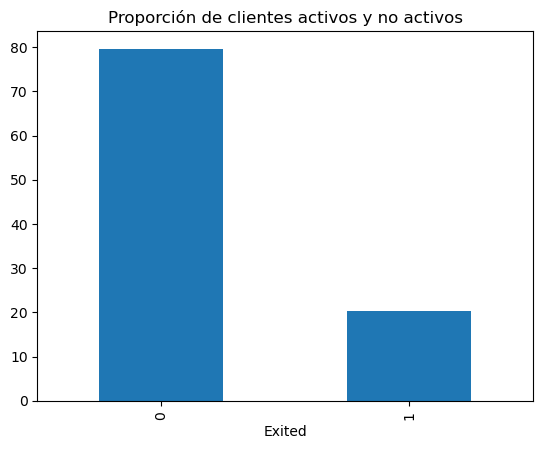

In [8]:
# Visualización del equilibrio de clases

(data.Exited.value_counts(1)*100).plot(kind='bar')

plt.title('Proporción de clientes activos y no activos')

<span style=color:blue> **Comentario:** </span>

El 80% de los datos son clientes activos, mientras que el 20% son clientes que han cancelado sus cuentas. Es una proporción 4:1 entre las clases 0 y 1. 

Existe un desbalance claro de las clases. 

## Entrenamiento de modelos

No se tomará en cuenta el desequilibrio de clases.

El problema es de clasificación binaria, por lo que se entrenarán modelos de tipo: árbol de decisión, bosque aleatorio y regresión logística. 

### Preprocesamiento de modelos

In [9]:
# Codificación de etiquetas para caracterísiticas categóricas

encoder = OrdinalEncoder()  # instancia de clase

# Ajuste y transformación de datos
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

In [10]:
# Separación de características y target

features = data_ordinal.drop('Exited', axis=1)
target = data_ordinal['Exited']

# Creación de sets de entrenamiento, validación y prueba (proporción 3:1:1)

# Primero se crean los sets de entrenamiento+validación 80% y prueba 20%

features_t_v, features_test, target_t_v, target_test = train_test_split(
    features, target, test_size=0.20, random_state=54321)

# Creación de set entrenamiento y validación

features_train, features_valid, target_train, target_valid = train_test_split(
    features_t_v, target_t_v, test_size=0.25, random_state=54321)

# Comprobación de tamaño y proporción de sets

print(features_train.shape, features_valid.shape, features_test.shape)

print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 10) (2000, 10) (2000, 10)
(6000,) (2000,) (2000,)


In [11]:
# Estandarización de características numéricas

# Características numéricas
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Creación de instancia de clase y ajuste de datos
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Modelo 1: árbol de decisión

In [12]:
# Entrenamiento y predicción con profundidades desde 1 hasta 10

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)

    # Entrenamiento del modelo
    model.fit(features_train, target_train)

    # Predicción con el modelo entrenado
    predicted_valid = model.predict(features_valid)

    # F1_score
    score = f1_score(target_valid, predicted_valid)

    print(f"max_depth: {depth}, f1_score: {score}")

max_depth: 1, f1_score: 0.0
max_depth: 2, f1_score: 0.5049928673323822
max_depth: 3, f1_score: 0.5424200278164116
max_depth: 4, f1_score: 0.5345345345345345
max_depth: 5, f1_score: 0.5217391304347826
max_depth: 6, f1_score: 0.5186335403726708
max_depth: 7, f1_score: 0.5521126760563381
max_depth: 8, f1_score: 0.5515320334261838
max_depth: 9, f1_score: 0.5461847389558233
max_depth: 10, f1_score: 0.5456953642384106


<span style=color:blue> **Comentario:** </span>

El mejor score se obutvo con una profundidad de 7, siendo de 0.5602240896358543

    max_depth: 7, f1_score: 0.5521126760563381

Sin embargo, no es lo suficientemente alto, por lo que un **árbol de decisión no es el modelo adecuado para este problema**. 

### Modelo 2: bosque aleatorio

In [13]:
# Bucle para probar diferentes valores del hiperparámetro n_estimators, desde 1 hasta 20
# También se probarán diferentes valores de profundidad, desde 1 hasta 20

best_score = 0
best_est = 0
best_depth = 0

for est in range(1, 21):
    for depth in range(1, 21):
        model = RandomForestClassifier(
            n_estimators=est, max_depth=depth, random_state=54321)

        # Entrenamiento
        model.fit(features_train, target_train)

        # Predicción
        predicted_valid = model.predict(features_valid)

        # Score con set de validación
        score = f1_score(target_valid, predicted_valid)

        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth

print(
    f"n_estimators: {best_est}, max_depth: {best_depth}, f1_score: {best_score}")

n_estimators: 11, max_depth: 12, f1_score: 0.6109589041095891


<span style=color:blue> **Comentario:** </span>

El mejor score se obutvo con 11 estimadores y una profundidad de 12, siendo de 0.6109589041095891

    n_estimators: 11, max_depth: 12, f1_score: 0.6109589041095891
    
El score obtenido está sobre el mínimo solicitado (0.59), por lo que **el modelo de bosque aleatorio podría ser el adecuado para este problema**. 

### Modelo 3: regresión logística

In [14]:
# Sin ajuste de pesos de clase

model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_lr = model.predict(features_valid)

score = f1_score(target_valid, predicted_valid)

print(f"f1_score: {score}")

f1_score: 0.5689900426742532


<span style=color:blue> **Comentario:** </span>

El valor obtenido de score **no es lo suficientemnte alto**, aunque sí es mejor que el obtenido con el árbol de decisión, para elegir este modelo como alternativa para este problema. 

    f1_score: 0.5689900426742532

## Selección de modelo

El **modelo con el mejor score** obtenido en el conjunto de validación fue el de **bosque aleatorio** con los siguientes hiperparámetros:

- estimadores: 11

- profundidad: 12

### Mejora de calidad del modelo

Se usarán los siguientes enfoques para mejorar la calidad del modelo:

1. Ajuste de pesos de clase

2. Sobremuestreo

3. Submuestreo


#### Ajuste de pesos de clase

In [15]:
model = RandomForestClassifier(
    n_estimators=11, max_depth=12, random_state=54321, class_weight='balanced')

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

print('score:', f1_score(target_valid, predicted_valid))

score: 0.5919610231425092


<span style=color:blue> **Comentario:** </span>

Ajustar los pesos de clase no funcionó, el score F1 bajó en lugar de subir. 

#### Sobremuestreo

In [16]:
# función para crear sets de entrenamiento con sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321)

    return features_upsampled, target_upsampled

# Creación de set de entrenamiento con la función de sobremuestreo
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3)

# Entrenamiento del modelo con sobremuestreo
model = RandomForestClassifier(
    n_estimators=11, max_depth=12, random_state=54321)

model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.6004618937644342


<span style=color:blue> **Comentario:** </span>

Con el sobremuestreo, disminuyó ligeramente el score, pero se mantuvo sobre el mínimo requerido de 0.59

    F1: 0.6004618937644342

#### Submuestreo

In [17]:
# Función para crear set de entrenamiento con submuestreo

def downsample(features, target, fraction):

    # Filtrado de características y target por clases 0 y 1
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Submuestreo
    features_downsampled = pd.concat([features_zeros.sample(
        frac=fraction, random_state=54321)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(
        frac=fraction, random_state=54321)] + [target_ones])

    # Barajeo de la información 
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=54321)

    return features_downsampled, target_downsampled

In [18]:
# Creación de set de entranamiento con submuestreo

# Se usa fraction = 0.25 debido a que los clases mayoritarias son 4 veces más que las minoritarias
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25)

In [19]:
# Entrenamiento de modelo

model = RandomForestClassifier(
    n_estimators=11, max_depth=12, random_state=54321)
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)

print('F1_score:', f1_score(target_valid, predicted_valid))

F1_score: 0.5801928133216477


<span style=color:blue> **Comentario:** </span>

Con el submuestreo, se obtuvo un score por debajo de lo requerido:

    F1_score: 0.5801928133216477


## AUC - ROC

In [20]:
# Entrenamiento del modelo con sobremuestreo
model = RandomForestClassifier(
    n_estimators=11, max_depth=12, random_state=54321)
model.fit(features_upsampled, target_upsampled)

# Predicción de probabilidades
probabilities_valid = model.predict_proba(features_valid)

# Selección de probabilidades positivas
probabilities_one_valid = probabilities_valid[:, 1]

# Cálculo del área bajo la curva ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8465989288971242


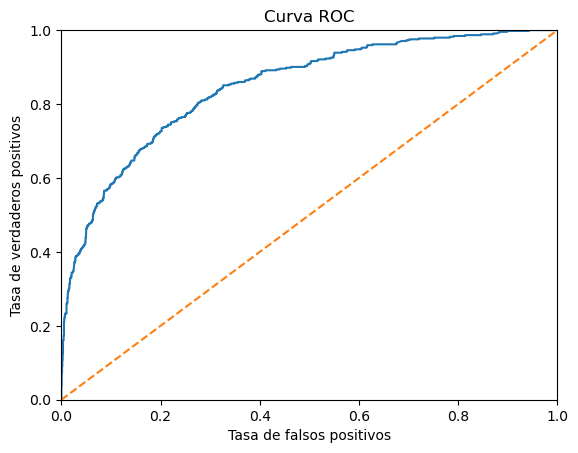

In [21]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')


# límite para los ejes de 0 a 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#  nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

# encabezado "Curva ROC"
plt.title('Curva ROC')

plt.show()

<span style=color:blue> **Comentario:** </span>

El AUC ROC de AUC-ROC: 0.8465989288971242 y la curva ROC nos indican que el modelo entrenado tiene una capacidad predictiva de buena calidad.

El valor es mayor que el score f1, lo cual es adecuado, pues no son métricas que midan lo mismo. Mientras más alto sea AUC ROC, mejor está cumpliendo su función predictiva el modelo. 

## Verificación con set de prueba

Se usará el modelo de bosque aleatorio con 11 estimadores, profundidad máxima de 12 y balanceo por sobremuestreo. 

In [22]:
# Entrenamiento del modelo
model = RandomForestClassifier(
    n_estimators=11, max_depth=12, random_state=54321)
model.fit(features_upsampled, target_upsampled)

# Predicción con set de prueba
predicted_test = model.predict(features_test)

# Score
print('f1_score:', f1_score(target_test, predicted_test))

f1_score: 0.6243654822335024


<span style=color:blue> **Comentario:** </span>

1. Se realizaron pruebas entrenando el modelo con los sets de sobremuestreo y submuestreo, obteniendo mejor score con el balanceo por sobremuetsreo.

2. El score obtenido con el set de prueba fue satisfactorio, superando el mínimo requerido (0.59):

        f1_score: 0.6243654822335024

## Conclusiones

1. El modelo elegido para predecir si un cliente cerrará su cuenta en el banco fue un bosque aleatorios con los siguientes hiperparámetros:

        - n_estimators: 11

        - max_depth: 12

2. La técnica de sobremuestreo dio el mejor resultado de f1_score con el set de prueba, a pesar de que, comparado con el entrenamiento sin ajuste de clases, dio un score ligeramente más bajo. 

3. Se superó el score mínimo requerido con el set de prueba:

        f1_score: 0.6243654822335024
        
4. El score f1 obtenido es satisfactorio, pues es mejor que un modelo que asigne clases de forma aleatoria. 

5. El AUC ROC fue de AUC-ROC: 0.8465989288971242, lo cual indica que la capacidad predictiva del modelo es de buena calidad. 